#### Árvore de Decisão

É um método de aprendizado supervisionado usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino aprendendo regras de decisão simples inferidas a partir dos recursos de dados. Quanto mais profunda a árvore, mais complexas as regras de decisão e mais adequado o modelo.

Vantagens:
* Simples de entender e interpretar e podem ser visualizadas;
* Requer pouca preparação de dados;
* O custo de usar a árvore é logarítimico sendo um dos custos mais eficientes que existem;
* Capaz de lidar com dados numéricos e categóricos;
* Possível validar um modelo usando testes estatísticos.

Desvantagens:
* Pode gerar árvores supercomplexas que não generalizam bem os dados;
* Pode ser instável ​​porque pequenas variações nos dados podem resultar na geração de uma árvore completamente diferente;
* As previsões de árvores de decisão não são suaves nem contínuas.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

Os dados da base `Credit.csv` são clientes de um banco alemão que solicitaram crédito e será utilizado o classificador para classificá-los em bons e maus pagadores.

In [2]:
dataset = pd.read_csv("data/Credit.csv")
dataset.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [3]:
dataset.shape

(1000, 21)

O atributo `shape` dá a ideia do tamanho do dataset, 1000 linhas e 21 colunas. O método `head` mostra as 5 primeiras entradas, podendo ser observado quais atributos são numéricos e quais são categóricos.

Com isso é criado a variável previsores que vai ter como valor as variáveis independentes, e a variável classe que será a variável dependente.

In [4]:
previsores = dataset.iloc[:, 0:20].values
classe = dataset.iloc[:, 20].values

A classe `LebelEncoder` da biblioteca `sklearn` transforma os atributos categóricos em atributos numéricos para se usar em um modelo que necessita de atributos numéricos.

In [5]:
le = []
for i in range(20):
    if i not in [1, 4, 7, 10, 12, 15, 17]:
        label = LabelEncoder()
        previsores[:, i] = label.fit_transform(previsores[:, i])
        le.append(label)

Agora fazendo a seleção de dados para treino e teste utilizando o método `train_test_split`, nesse caso é escolhida a proporção de teste no argumento `test_size`.

In [70]:
x_train, x_test, y_train, y_test = train_test_split(
    previsores,
    classe,
    test_size=0.3,
    random_state=0
)

a classe `DecisionTreeClassifier` cria um objeto que criará o modelo da decision tree utilizando o método `fit`

In [7]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
from six import StringIO
import graphviz
import pydotplus
from IPython.display import Image  

Com o modelo criado é possível visualizar a árvores de decisão. Utilizando a classe `StringIO` e o método `export_graphvis` cria uma árvore que é a representação do modelo na variável `dot_data`. A biblioteca `pydotplus` permite pegar essa árvore e representá-la através de um grafo, pelo método `graph_from_dot_data`. Para visualizar a imagem, utiliza-se a classe `Image`.

Se for interessante salvar a árvore em um arquivo .dot para ser visualizado em outras ferramentas, é possível fazê-lo alterando o parâmetro passado para o argumento `out_file` um caminho para salvar o arquivo.dot.

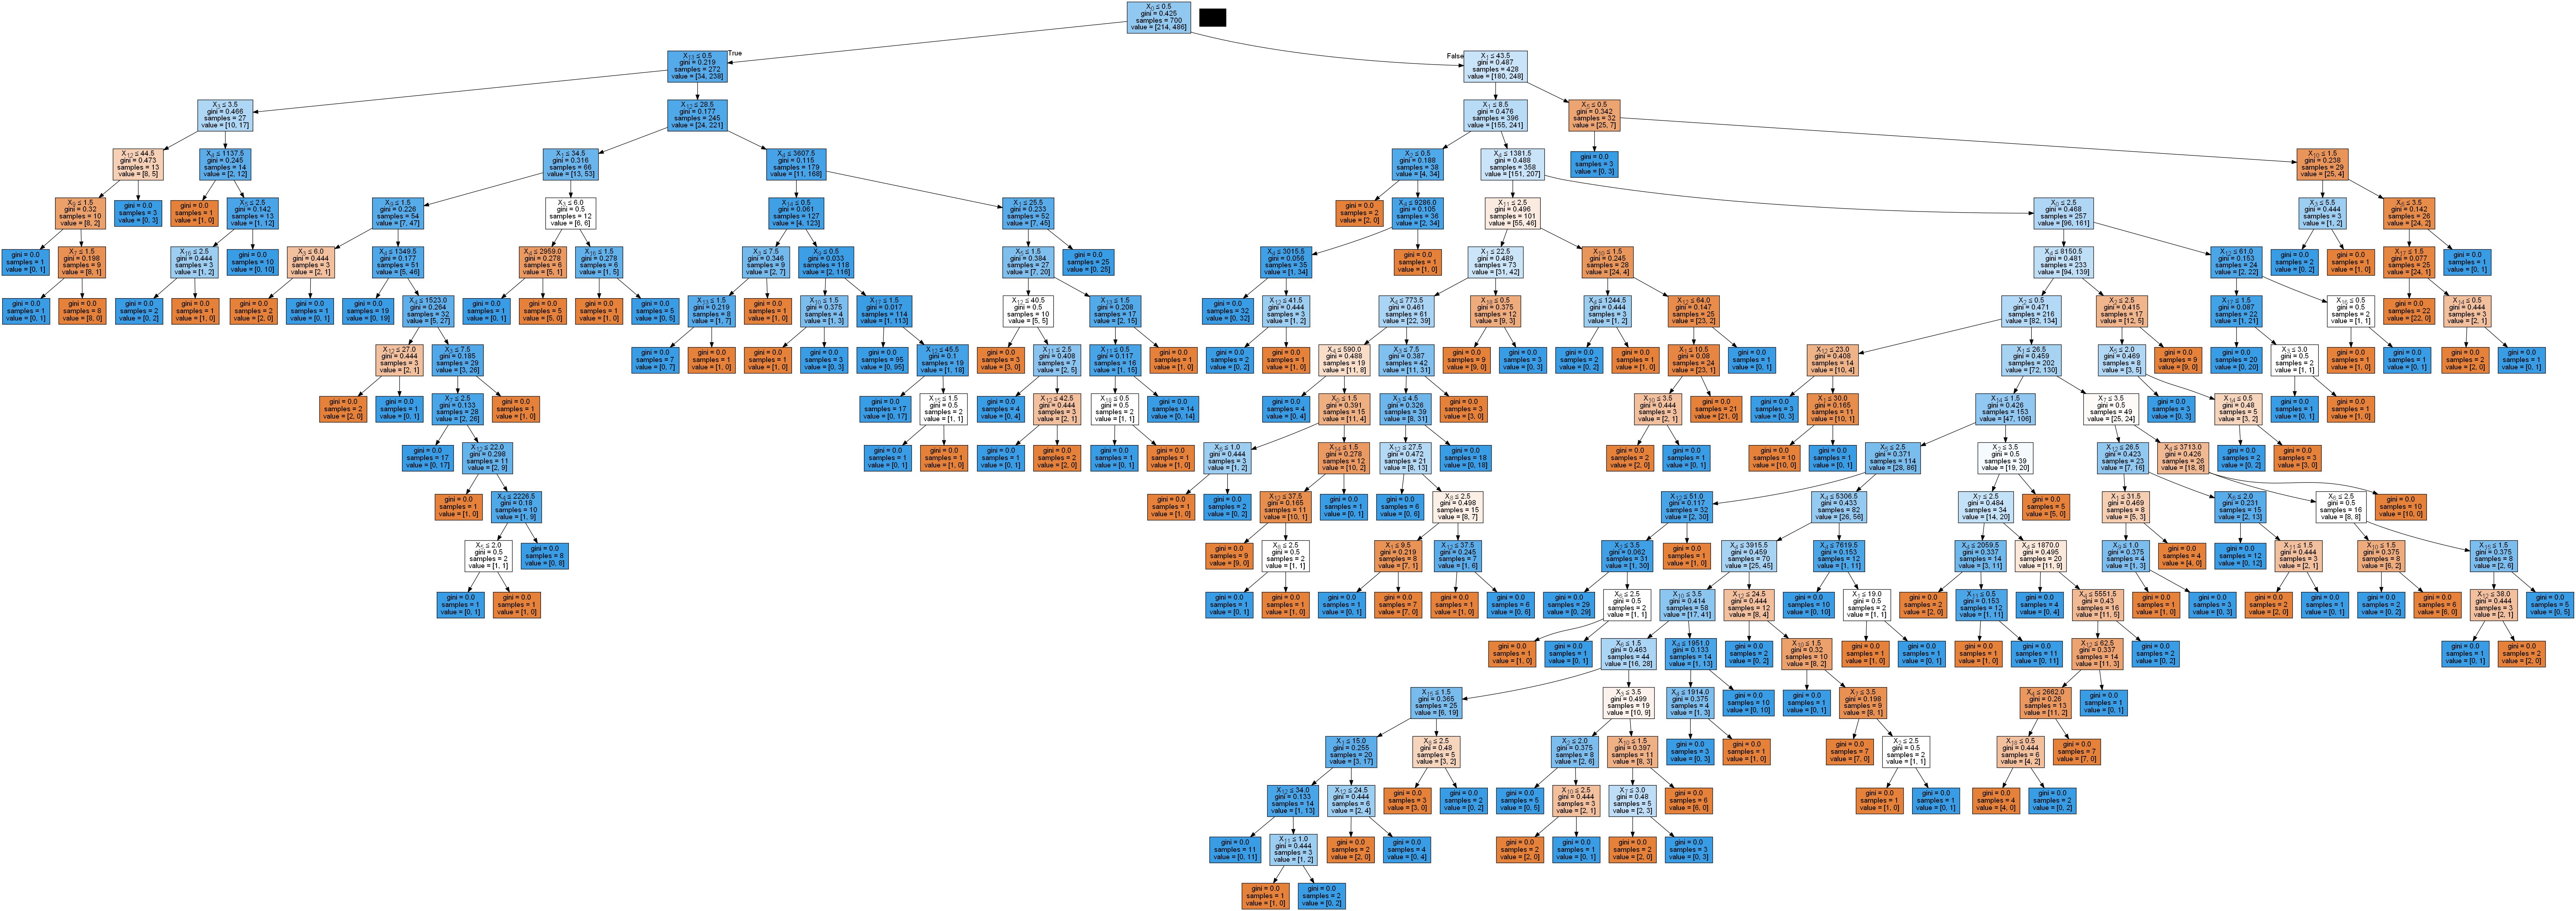

In [13]:
dot_data = StringIO()
export_graphviz(
    tree,
    out_file=dot_data,  # Mudar para out_file="Nome.dot" para salvar em arquivo .dot
    filled=True,
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [10]:
previsoes = tree.predict(x_test)
confusion_matrix(y_test, previsoes)

array([[ 44,  42],
       [ 51, 163]], dtype=int64)

In [47]:
accuracy_score(y_test, previsoes)

0.6933333333333334

Com o modelo preparado é possível prever os resultados utilizando os dados de teste e calcular a matriz de confusão.

Além disso como visto no Naive Bayes é possível utilizar o método `accuracy_score` para calcular a taxa de acerto, nesse casso ela foi de 69,3% que é um bom resultado.

Porém a árvore gerada é mto complexa, e o dataset utilizado para gerar o modelo, possui muitos atributos. É interessante necesse caso, analisar se algum atributo não é muito importante para o modelo, se alterar ele, gera uma variação muito pequena. Se isso acontecer é possível então criar um modelo com menos atributos independentes ou até um modelo com menos atributos e com um melhor desempenho.

Para isso é necessário utilizar a classe `ExtraTreesClassifier` da biblioteca `Sklearn`.

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

O algoritmo dessa classe possui o atributo `feature_importances_` que calcula a importância do atributo, quanto maior o valor, maior a importância.

In [15]:
modelo = ExtraTreesClassifier()
modelo.fit(x_train, y_train)
modelo.feature_importances_

array([0.10910783, 0.08501066, 0.06396326, 0.06013179, 0.0806507 ,
       0.04719405, 0.05291878, 0.05113902, 0.04497667, 0.02510855,
       0.05250653, 0.05165585, 0.06397598, 0.03612996, 0.03667084,
       0.03378567, 0.04166215, 0.02382133, 0.0318241 , 0.0077663 ])

Agora é possível analisar os maiores valores referente à importância dos atributos, selecionando então os 3 maiores, que são os atributos da coluna 0, da coluna 1 e da coluna 4.

Então o modelo é refeito utilizando apenas essas 3 colunas.

In [71]:
x_train = x_train[:, [0, 1, 4]]
x_test = x_test[:, [0, 1, 4]]

Dessa vez, para criar o modelo, é passado um atributo para a classe, que é o `max_depth`, limitando a profundidade da árvore, isso é feito para reduzir a complexidade da árvore e gerar uma árvore menor e mais eficiente.

In [72]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

É então calculado a matriz de confusão e o accuracy score do modelo.

In [73]:
previsoes = tree.predict(x_test)
confusion_matrix(y_test, previsoes)

array([[ 21,  65],
       [ 25, 189]], dtype=int64)

In [74]:
accuracy_score(y_test, previsoes)

0.7

Nesse caso a taxa de acerto é de 70% que é um pouco melhor que o modelo anterior, porém é necessário entender que esse valor além de ser melhor, foi alcançado utilizando apenas 3 atributos e não 19, e a árvore tendo apenas uma profundidade de 4 níveis e não 19 igual anteriormente.

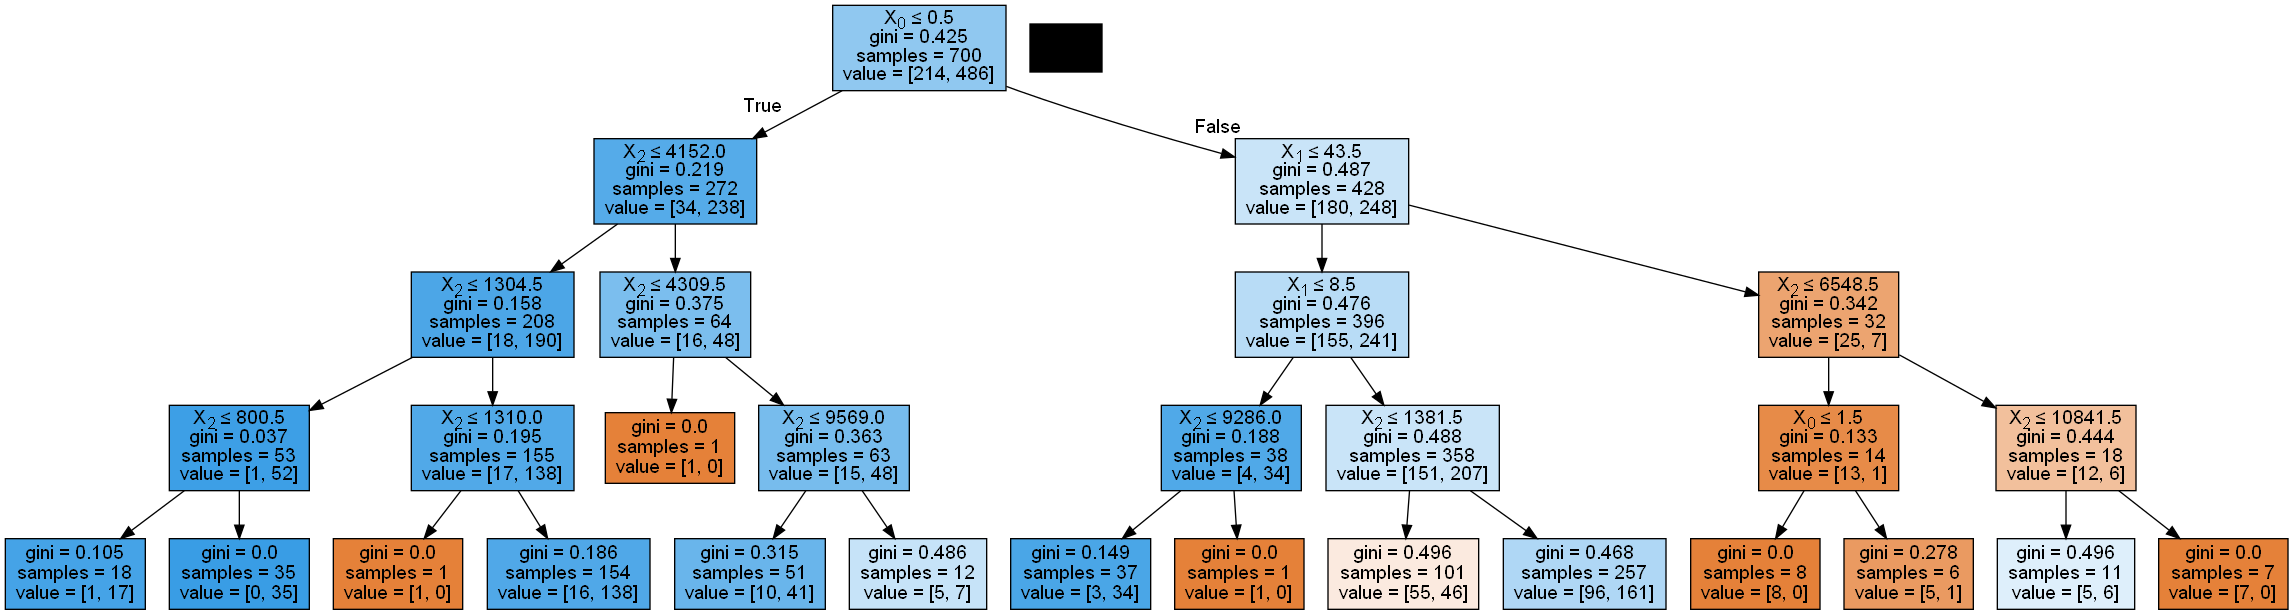

In [75]:
dot_data2 = StringIO()
export_graphviz(
    tree,
    out_file=dot_data2,  # Mudar para out_file="Nome.dot" para salvar em arquivo .dot
    filled=True,
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())

Image(graph.create_png())

Lembrando que gerar modelos com menos atributos nem sempre gera modelos melhores.